In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim
from ema_workbench.analysis import dimensional_stacking

from ema_workbench import (
    ema_logging,
    MultiprocessingEvaluator,
    Policy
)
from problem_formulation import get_model_for_problem_formulation

In [28]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [29]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [30]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [31]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [32]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [33]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [34]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x0000023A95D79EE0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x0000023A95D79EE0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x0000023A95D79EE0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x0000023A95D79EE0>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x0000023A95D79EE0>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x0000023A95D79EE0>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [35]:
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    )
]

In [36]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:07<00:00, 13.16it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [37]:
experiments, outcomes = results

In [38]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.0,6.408262e+07,0.063004,1.198718e+09,2.131791,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
1,5.397251e+07,0.0,1.944485e+07,0.018764,6.947035e+07,0.124813,1.382426e+07,0.007095,1.228740e+09,1.040260,253800000.0,0.0
2,5.397251e+07,0.0,2.665111e+08,0.265106,6.190967e+08,1.170919,1.202518e+07,0.006019,0.000000e+00,0.000000,253800000.0,0.0
3,5.397251e+07,0.0,1.709847e+07,0.018638,6.195271e+08,1.207531,6.581024e+05,0.000336,0.000000e+00,0.000000,253800000.0,0.0
4,5.397251e+07,0.0,7.756630e+08,0.790309,1.236250e+07,0.024847,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.397251e+07,0.0,3.016749e+07,0.034669,4.197137e+06,0.009126,1.315288e+06,0.000850,0.000000e+00,0.000000,253800000.0,0.0
96,5.397251e+07,0.0,3.241158e+08,0.262552,5.273681e+07,0.083385,3.575213e+07,0.014307,1.863714e+08,0.145513,253800000.0,0.0
97,5.397251e+07,0.0,3.917290e+06,0.003438,9.822411e+07,0.157067,0.000000e+00,0.000000,2.268443e+08,0.181276,253800000.0,0.0
98,5.397251e+07,0.0,7.340908e+08,0.698694,0.000000e+00,0.000000,0.000000e+00,0.000000,1.860085e+07,0.017778,253800000.0,0.0


In [39]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,100,251.712526,10.0,0.445265,198.965167,10.0,0.494677,202.165402,1.0,0.215831,...,0,0,0,0,0,0,0,100,policy 0,dikesnet
1,37,178.992564,10.0,0.139741,335.625408,1.5,0.803185,284.786136,10.0,0.783782,...,0,0,0,0,0,0,0,101,policy 0,dikesnet
2,83,150.310130,1.5,0.451532,339.031749,1.5,0.252838,42.149134,10.0,0.307533,...,0,0,0,0,0,0,0,102,policy 0,dikesnet
3,124,277.747541,1.0,0.478732,297.267729,1.0,0.788963,296.852861,1.0,0.295912,...,0,0,0,0,0,0,0,103,policy 0,dikesnet
4,87,326.338384,1.5,0.532912,114.607290,10.0,0.002382,290.351498,10.0,0.279795,...,0,0,0,0,0,0,0,104,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24,240.044356,1.5,0.909409,135.886362,10.0,0.692516,178.052319,1.0,0.928717,...,0,0,0,0,0,0,0,195,policy 0,dikesnet
96,26,349.689133,1.0,0.428692,120.510043,10.0,0.230471,238.215666,10.0,0.431832,...,0,0,0,0,0,0,0,196,policy 0,dikesnet
97,65,83.998892,1.0,0.236332,321.449340,1.5,0.986627,92.069811,1.0,0.573915,...,0,0,0,0,0,0,0,197,policy 0,dikesnet
98,70,250.703277,10.0,0.200424,203.735471,1.0,0.105735,258.267933,1.5,0.675305,...,0,0,0,0,0,0,0,198,policy 0,dikesnet


In [40]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

Uncertainty analysis: feature scoring

In [41]:
#'discount rate 0','discount rate 1','discount rate 2',
#'A.0_ID flood wave shape',
#'A.1_Bmax','A.1_pfail','A.1_Brate',
#'A.2_Bmax','A.2_pfail','A.2_Brate',
#'A.3_Bmax','A.3_pfail','A.3_Brate',
#'A.4_Bmax','A.4_pfail','A.4_Brate',
#'A.5_Bmax','A.5_pfail','A.5_Brate',


In [42]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

Table uncertainty outcomes

In [43]:
uncertainty_outcomes = experiments.loc[:,list_of_uncertainties]
uncertainty_outcomes

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,2.5,3.5,100,251.712526,0.445265,10.0,198.965167,0.494677,10.0,202.165402,0.215831,1.0,320.529109,0.638408,10.0,209.341918,0.413237,10.0
1,4.5,2.5,1.5,37,178.992564,0.139741,10.0,335.625408,0.803185,1.5,284.786136,0.783782,10.0,125.491091,0.591725,1.0,341.455198,0.022365,1.0
2,2.5,4.5,2.5,83,150.310130,0.451532,1.5,339.031749,0.252838,1.5,42.149134,0.307533,10.0,341.447688,0.323883,10.0,285.897953,0.617018,10.0
3,4.5,4.5,1.5,124,277.747541,0.478732,1.0,297.267729,0.788963,1.0,296.852861,0.295912,1.0,261.127865,0.398618,10.0,59.386702,0.551034,1.0
4,2.5,4.5,3.5,87,326.338384,0.532912,1.5,114.607290,0.002382,10.0,290.351498,0.279795,10.0,33.292589,0.963431,1.5,277.538841,0.463567,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.5,3.5,2.5,24,240.044356,0.909409,1.5,135.886362,0.692516,10.0,178.052319,0.928717,1.0,48.420284,0.773261,10.0,171.747835,0.933281,10.0
96,1.5,1.5,4.5,26,349.689133,0.428692,1.0,120.510043,0.230471,10.0,238.215666,0.431832,10.0,324.872992,0.291373,1.5,190.468427,0.146894,1.5
97,2.5,2.5,1.5,65,83.998892,0.236332,1.0,321.449340,0.986627,1.5,92.069811,0.573915,1.0,225.780834,0.894593,1.5,50.812887,0.402460,1.5
98,2.5,4.5,2.5,70,250.703277,0.200424,10.0,203.735471,0.105735,1.0,258.267933,0.675305,1.5,271.359275,0.612282,1.5,144.176516,0.139333,1.5


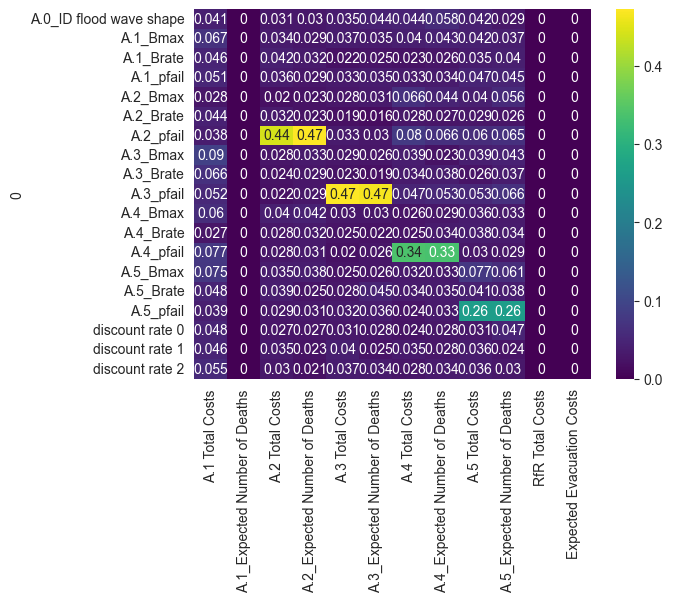

In [44]:
from ema_workbench.analysis import feature_scoring

x = uncertainty_outcomes
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()